## Overview of the Project

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

----
## Goal of the project

Our goal is to find out if there artificial review are generated from AI with are not fair or biased for the movie lovers based off the 538 article and see if we reach a similar conclusion.

----
## Understanding the background and data
#### Read this article: __[Be suspicious of online movie ratings, especially Fandango's](https://fivethirtyeight.com/features/fandango-movies-ratings/)__

----
### Over view of the data been used here in the analysis 

## The Data

This is the data behind the story __[Be suspicious of online movie ratings, especially Fandango's](https://fivethirtyeight.com/features/fandango-movies-ratings/)__ openly available on 538's github: https://github.com/fivethirtyeight/data/ There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [1]:
#importing all the necessary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#exporting the fandango data 
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [6]:
fandango.isnull().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64

### So, the data is already cleaned and readyly avaialble for use we will try to explore the relationship between popularity of a film and its rating using a scatterplot.

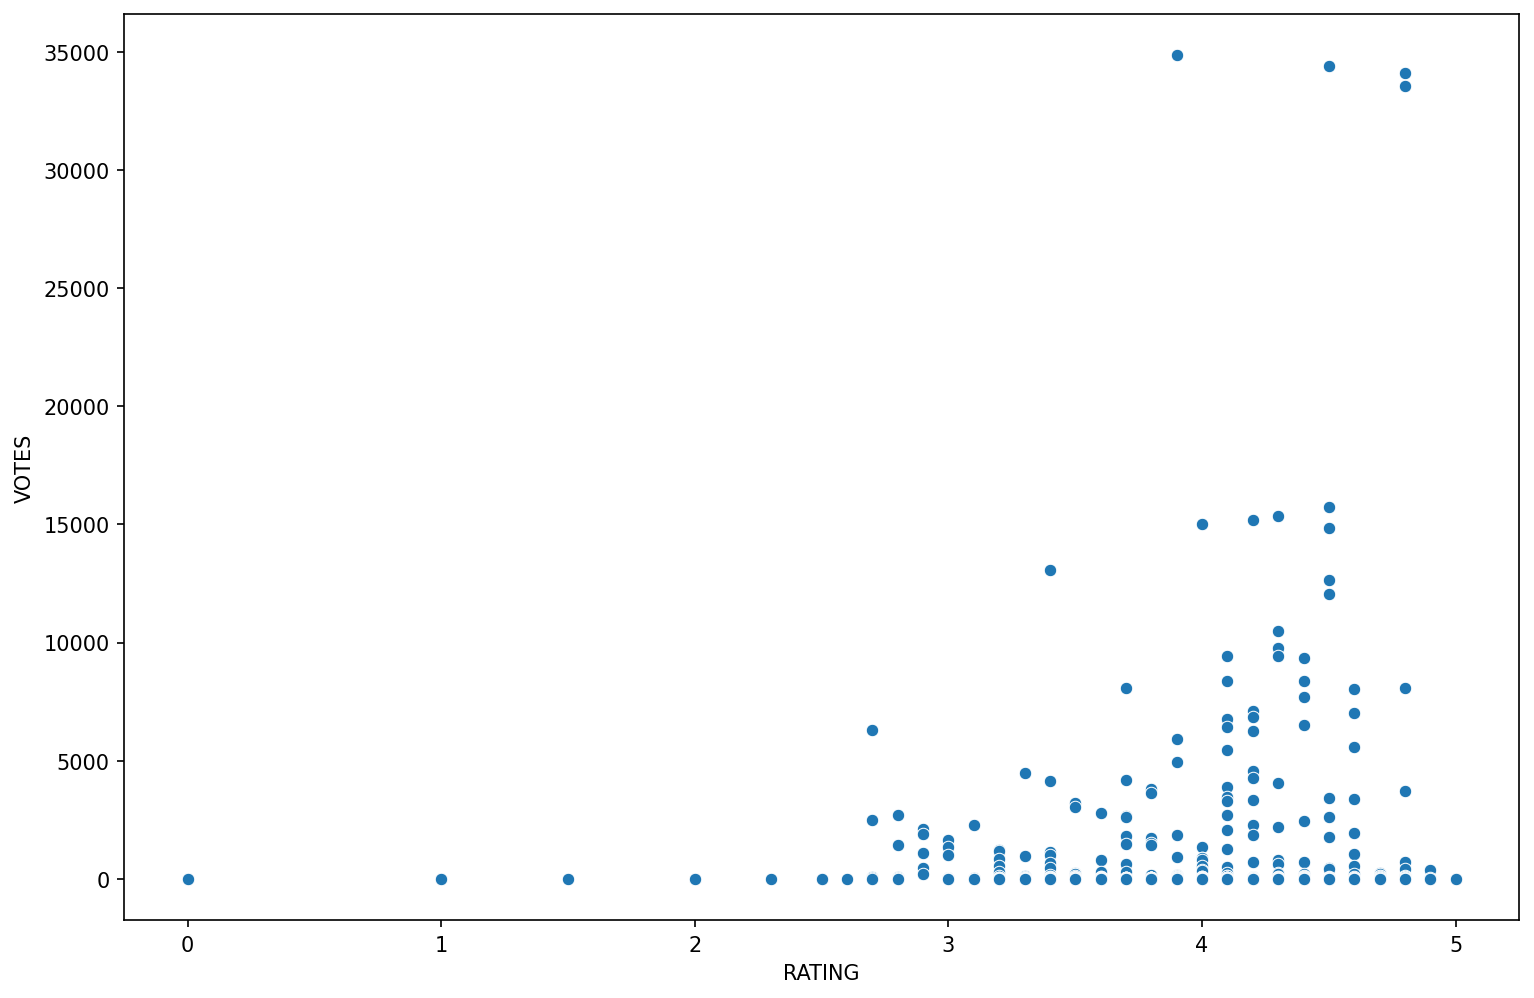

In [7]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES');

Based on the scatterplot above, we can conclude that there are only a few films that have been rated low out of all the movies listed above, which is quite suspicious. We can also see that there are a lot of movies with ratings higher than 3 to 5 stars.

In [8]:
#Calculating the correlation between the columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Now, that the basic EDA is been completed we will split the movie year from the name column

In [9]:
#using the lamda function and .apply methord to split the year from the name based on indexing
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [10]:
#removing the ')' from the seperated column
fandango['YEAR'] = fandango['YEAR'].str.replace(')','')

C:\Users\gokul\AppData\Local\Temp\ipykernel_9616\3719956574.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fandango['YEAR'] = fandango['YEAR'].str.replace(')','')


In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

### Visualize the count of movies per year with a plot

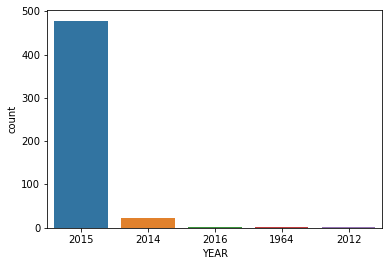

In [12]:
sns.countplot(data=fandango,x='YEAR');

When comparing the years, we can see that the movies rated are those that were released in 2015.

In [13]:
#10 movies with has the highest number of votes
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Finding how many movies have zero votes

In [14]:
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

### Creating DataFrame of only reviewed films by removing any films that have zero votes.

In [15]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [16]:
fan_reviewed['VOTES'].isnull().sum()

0

In [17]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### As mentioned in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.

#### Creating a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).

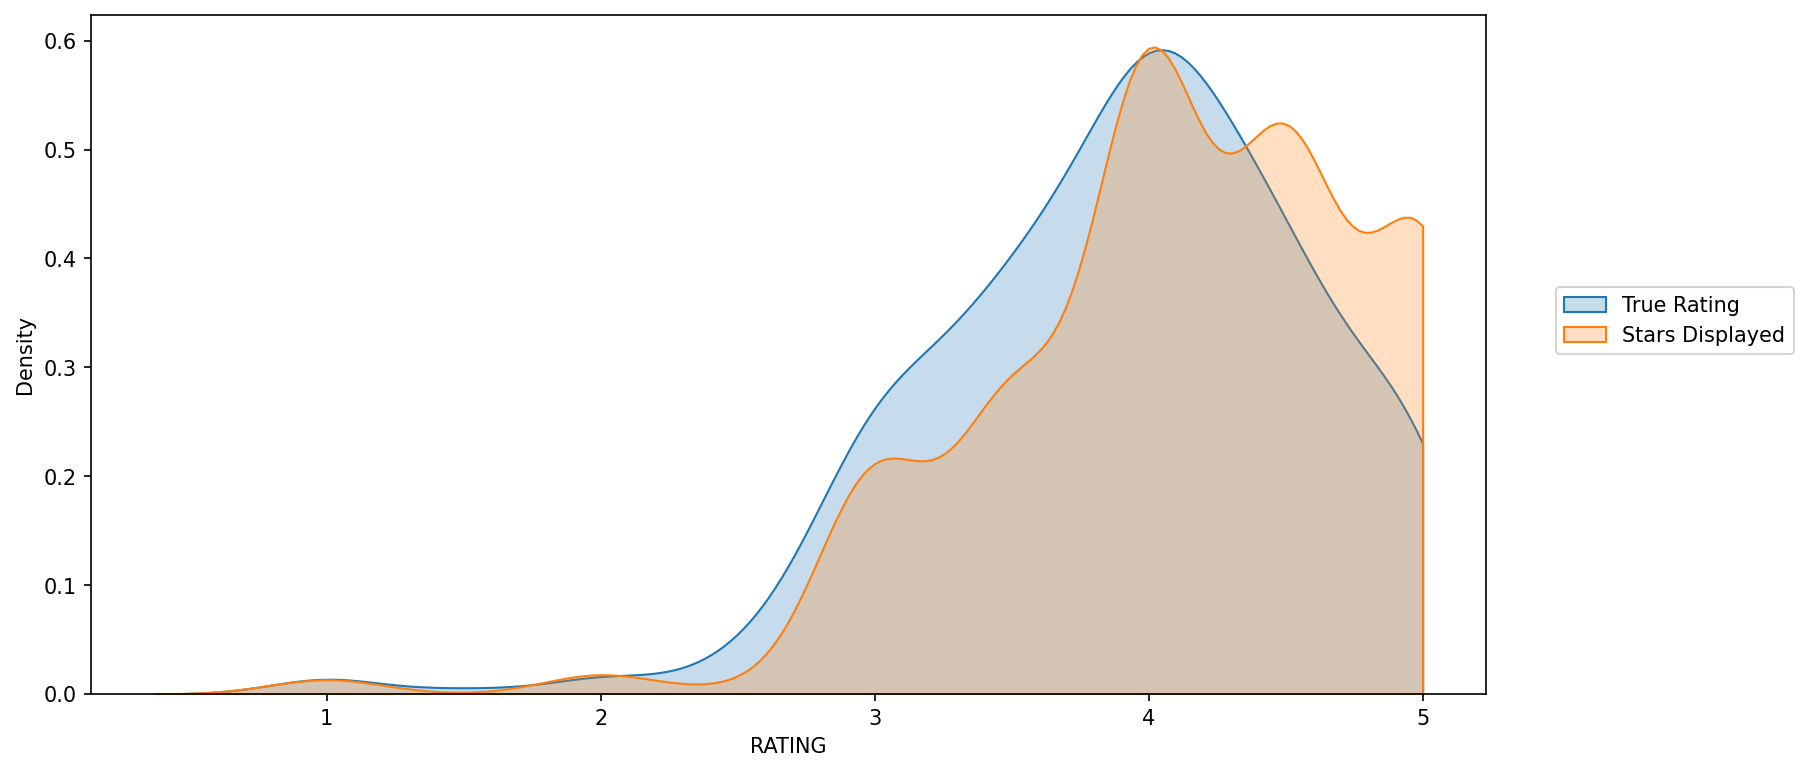

In [18]:
#chiping the KDE plot to range 0-5 because the starts and ratings are limited to 5
plt.figure(figsize=(12,6), dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05, 0.5))

According to the above table, there is a significant bias between ratings 4 and 5. When the ratings plummet dramatically and the stars are displayed incorrectly.

### Let's now actually quantify this discrepancy by creating a new column to find the different between STARS displayed versus true RATING.

In [19]:
#sub starts from rating and rounded the answer to nearest decimal point
fan_reviewed['STARS_DIFF'] = np.round(fan_reviewed['STARS'] - fan_reviewed['RATING'],2)

C:\Users\gokul\AppData\Local\Temp\ipykernel_9616\2804449147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = np.round(fan_reviewed['STARS'] - fan_reviewed['RATING'],2)


In [20]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Creating a count plot to display the number of times a certain difference occurs

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

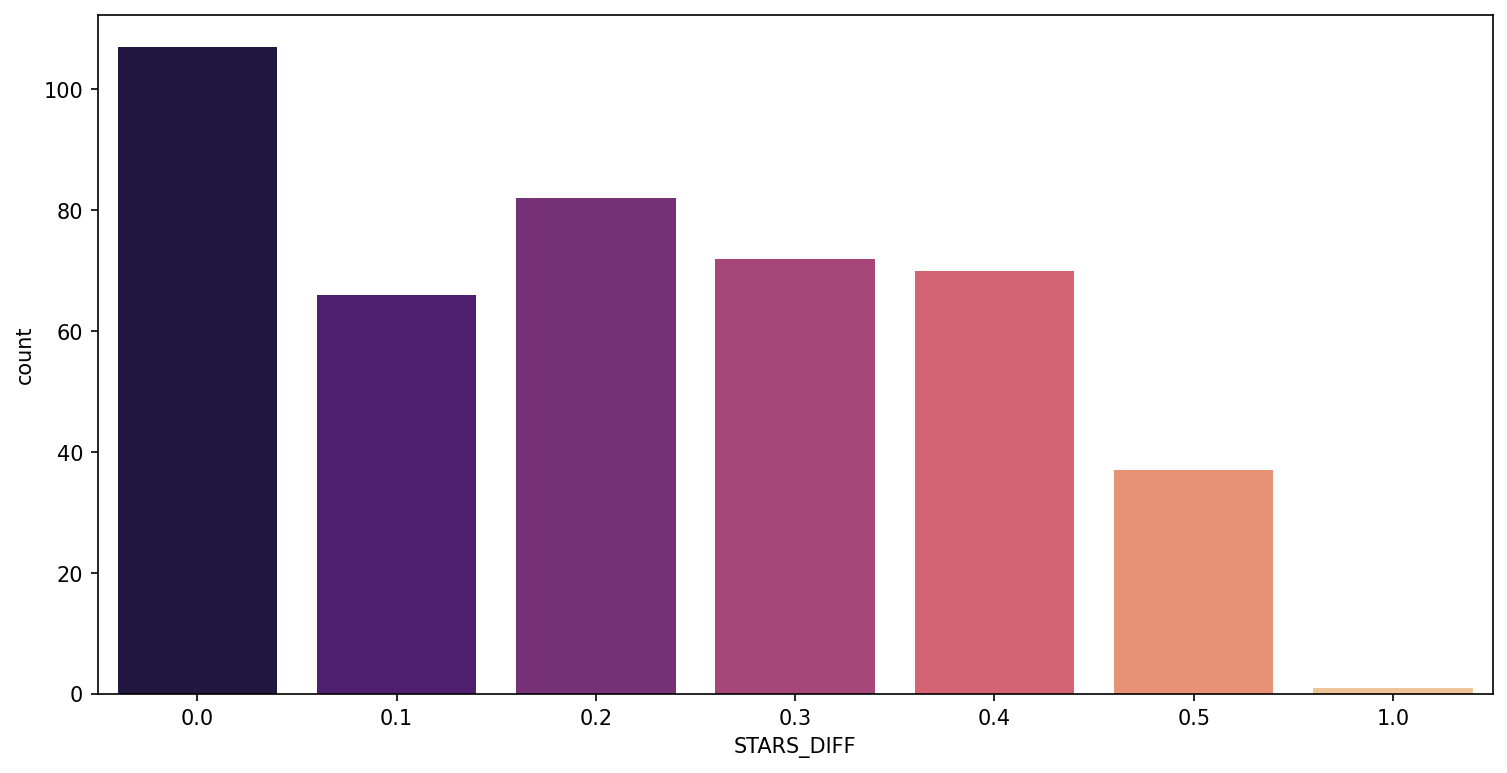

In [21]:
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

From the above table we can infer that there are few hundred movies that displays more starts than the actual ratings. We can see from the plot that one movie was displaying over a 1 star difference than its true rating! 

In [22]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Turbo Kid was the movie which actually had a rating of 4 but the displayed start rating was 5!

# Comparison of Fandango Ratings to Other Sites

In [23]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [24]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [26]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes
RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

#### Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

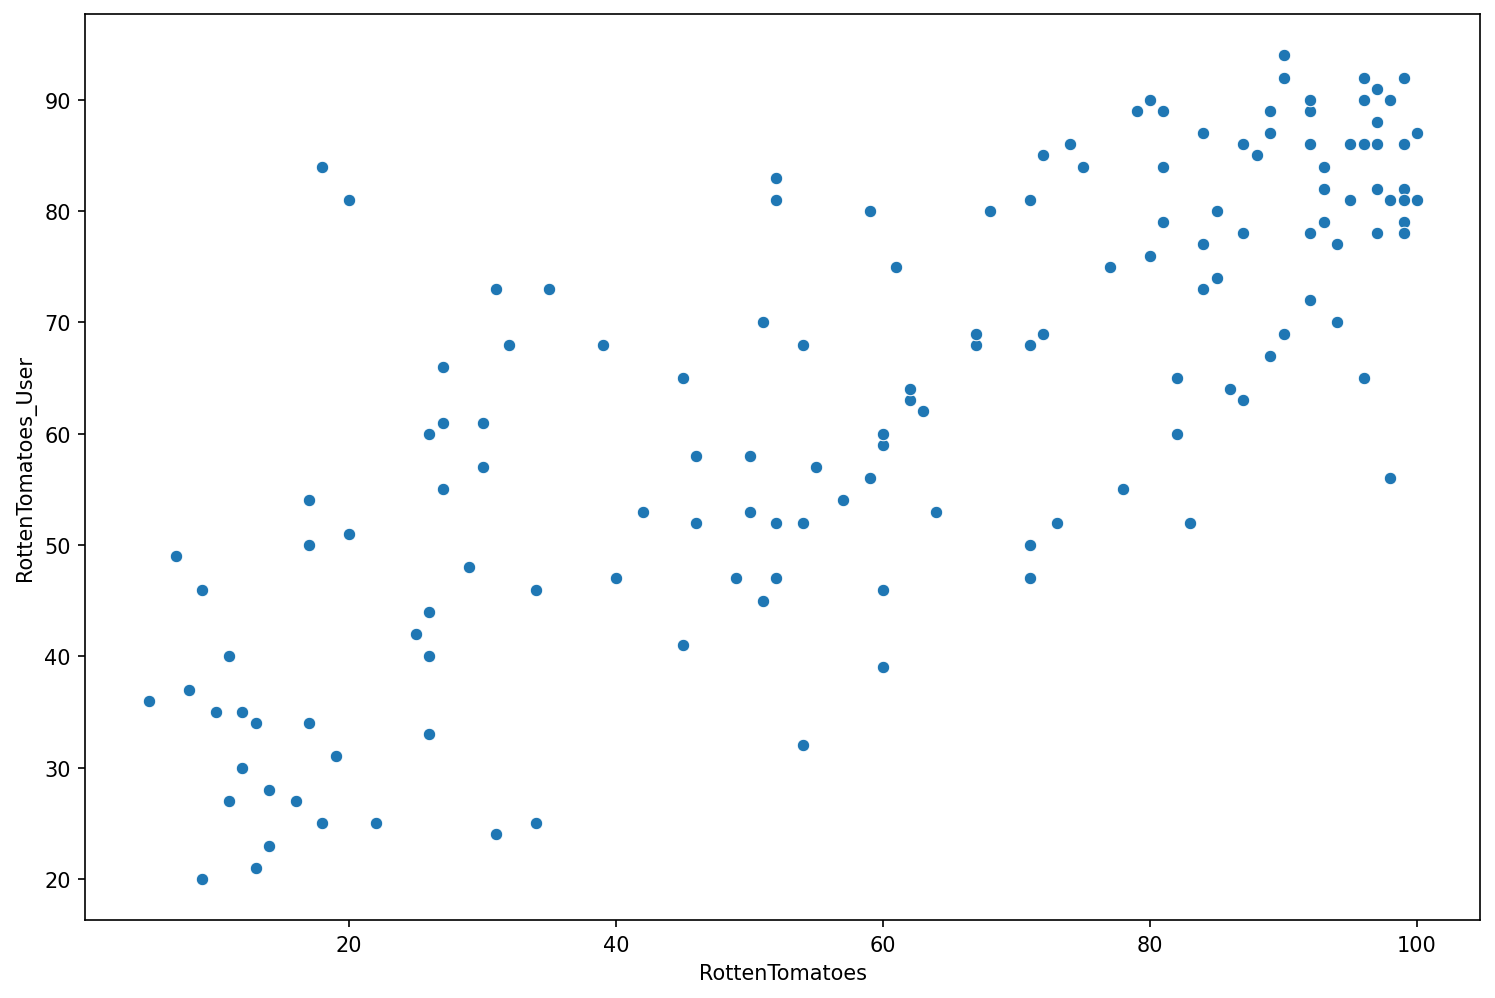

In [27]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')

Quantify the difference by comparing the critics ratings and the RT User ratings. We will calculate this with `RottenTomatoes`-`RottenTomatoes_User`.

`Rotten_Diff` here is `Critics` - `User Score`. So values closer to 0 means aggrement between Critics and Users. 
1. Larger positive values means critics rated much higher than users. 
2. Larger negative values means users rated much higher than critics.

### Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.

In [28]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [29]:
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

Comparing the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [30]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

### Ploting the distribution of the differences between RT Critics Score and RT User Score. 

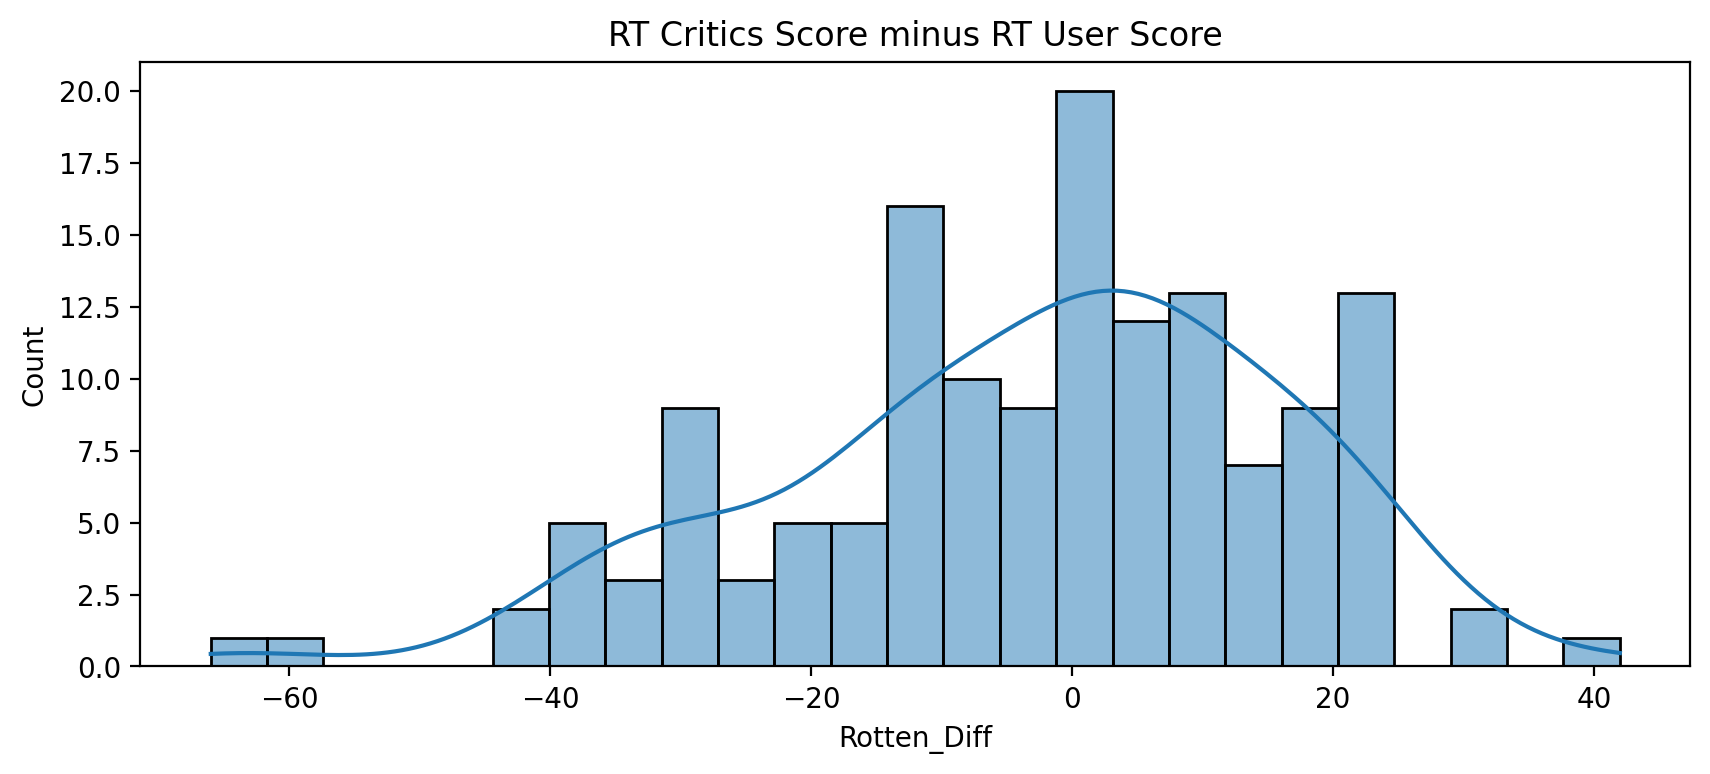

In [31]:
#There will be negative values, because 'RottenTomatoes_User' might have higer count when comapred to RottenTomatoes
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.title('RT Critics Score minus RT User Score');

### Creating distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes

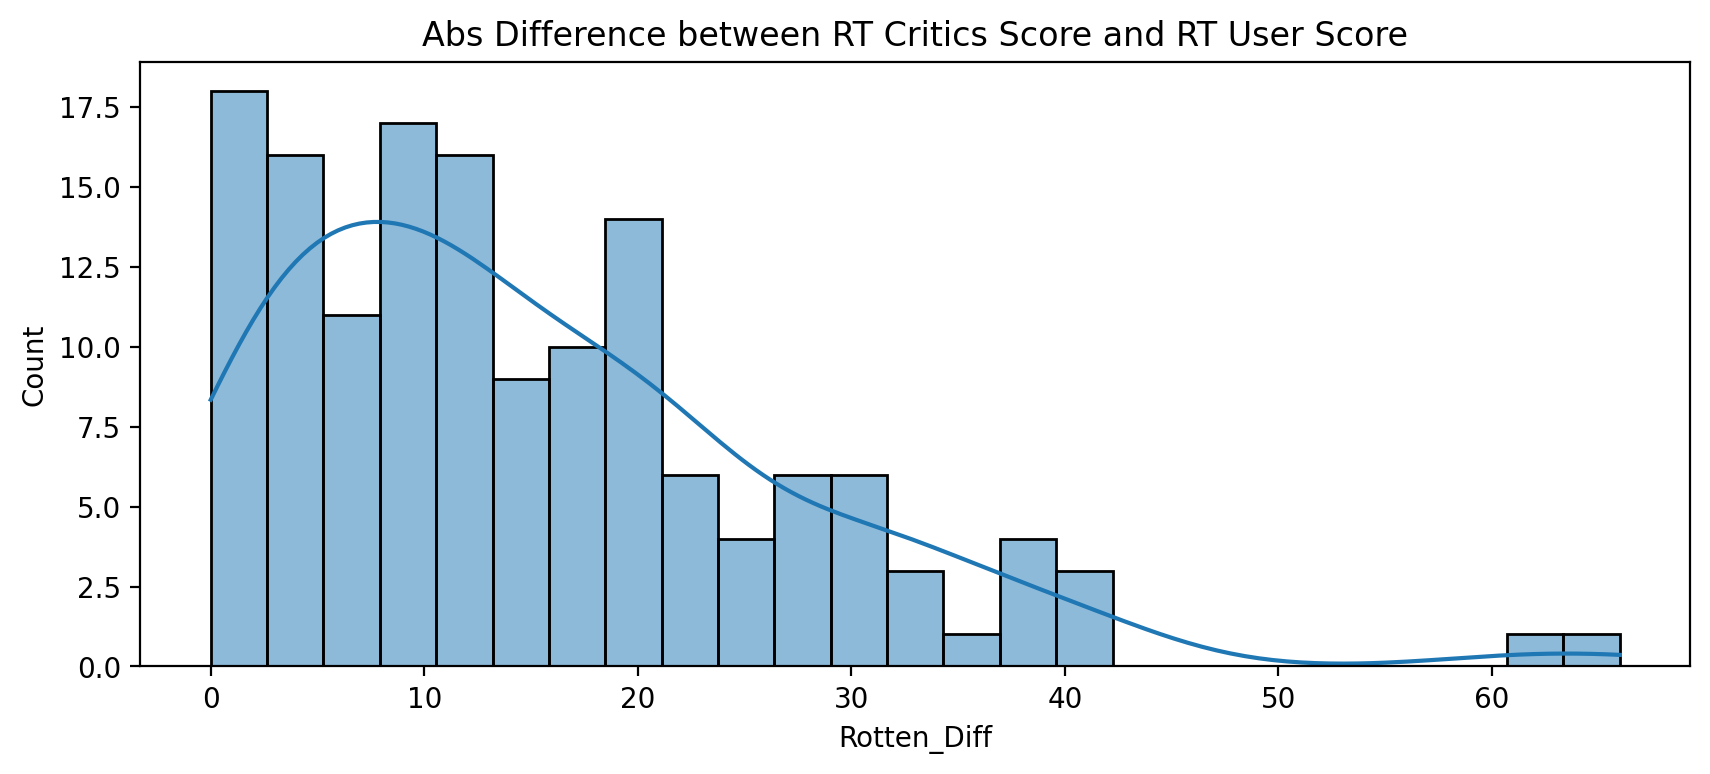

In [32]:
#using the apply methor call again to get rid of null value in the 'Rotten_Diff' column
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True)
plt.title('Abs Difference between RT Critics Score and RT User Score');

### Finding out which movies are causing the largest differences.  Showing the top 5 movies with the largest negative difference between Users and RT critics.

Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.

In [33]:
#top 5 movies users rated higher than critics on average
print('The users loves these movies, but the critics hate')
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

The users loves these movies, but the critics hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


### Finding the top 5 movies critics scores higher than users on average

In [34]:
print('The critics loves these movies, but the users hate')
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

The critics loves these movies, but the users hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


# MetaCritic
Metacritic also shows an average user rating versus their official displayed rating.

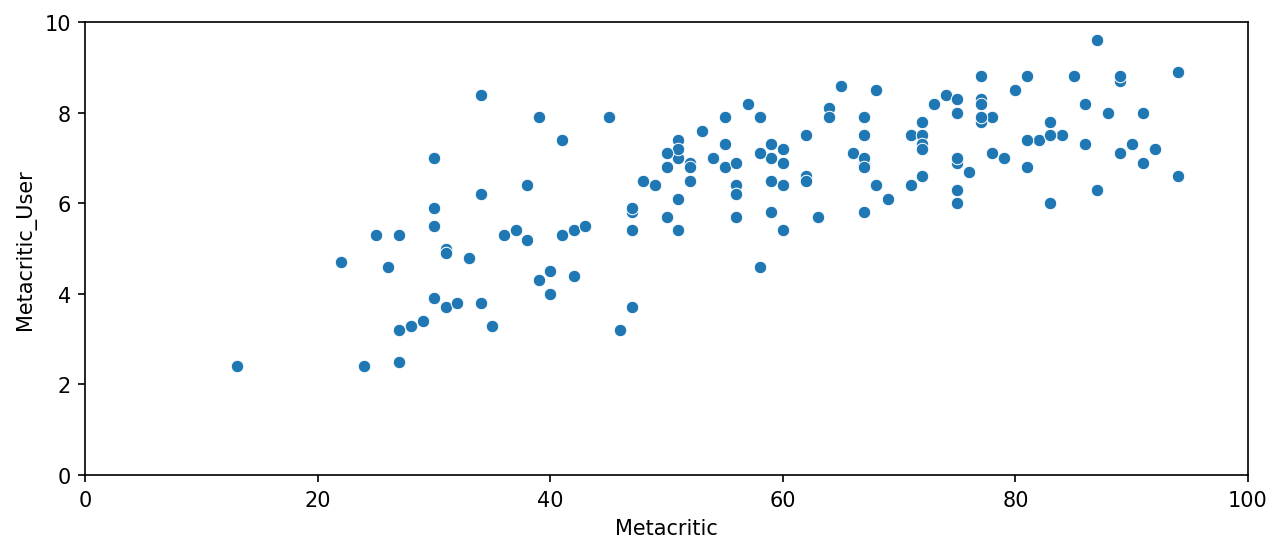

In [35]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

# IMBD
Let's explore IMBD. Note: Both Metacritic and IMDB report back vote counts

#### Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

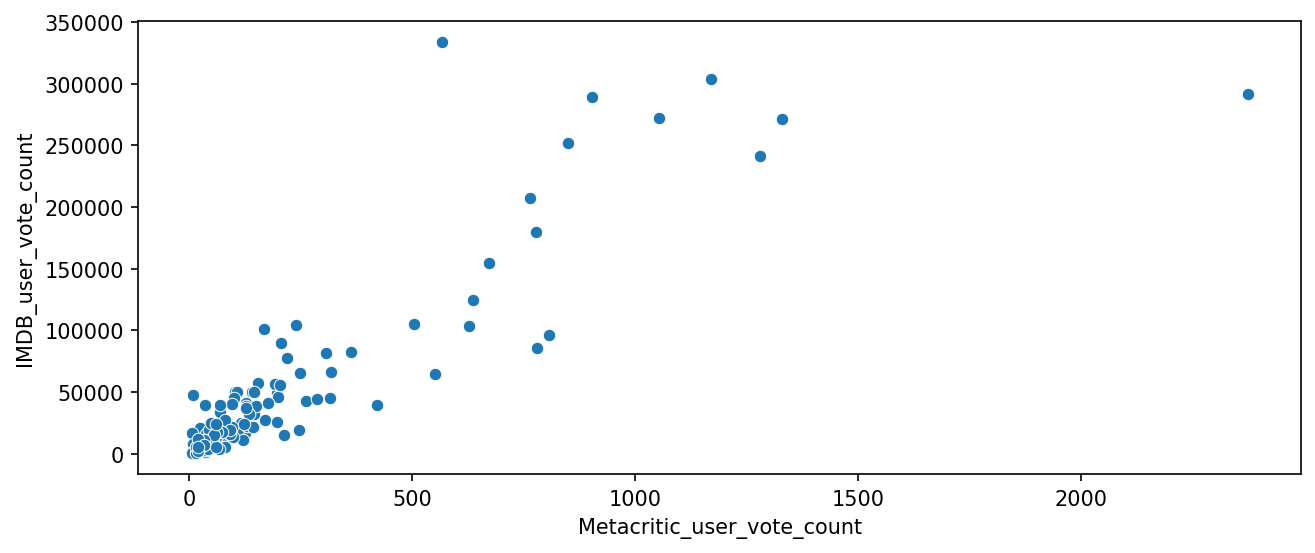

In [36]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

#### Outliers: The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. 

In [37]:
#finding out what movie that is
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [38]:
#finding out which movie has the highest metacritic users vote count
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandago Scores vs. All Sites
Exploring whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

### Combaining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so doing an inner merge to merge together both DataFrames based on the FILM columns.

In [39]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [41]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


# Normalize columns to Fandango STARS and RATINGS 0-5
Rotten Tomatoes, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

#### Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.

Converting ratings based on:
* 100/20 = 5
* 10/2 = 5

In [42]:
#we are creating a column 'RT_Norm' and 'RTU_Norm' to to get the normalized version of rotten tomatos 
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [43]:
#Creating a column 'Meta_Norm' and 'Meta_U_Norm' to to get the normalized version of Metacritic
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)

In [44]:
#Creating a column for IMDb normalization
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [45]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


#### Now, we have the desired output we will create a `norm_scores` DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.

In [46]:
norm_score = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [47]:
norm_score.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## Comparing Distribution of Scores Across Sites
Trying to visualize the question does fandango display abnormally high ratings?

We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

#### Creating a plot comparing the distributions of normalized ratings across all sites. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


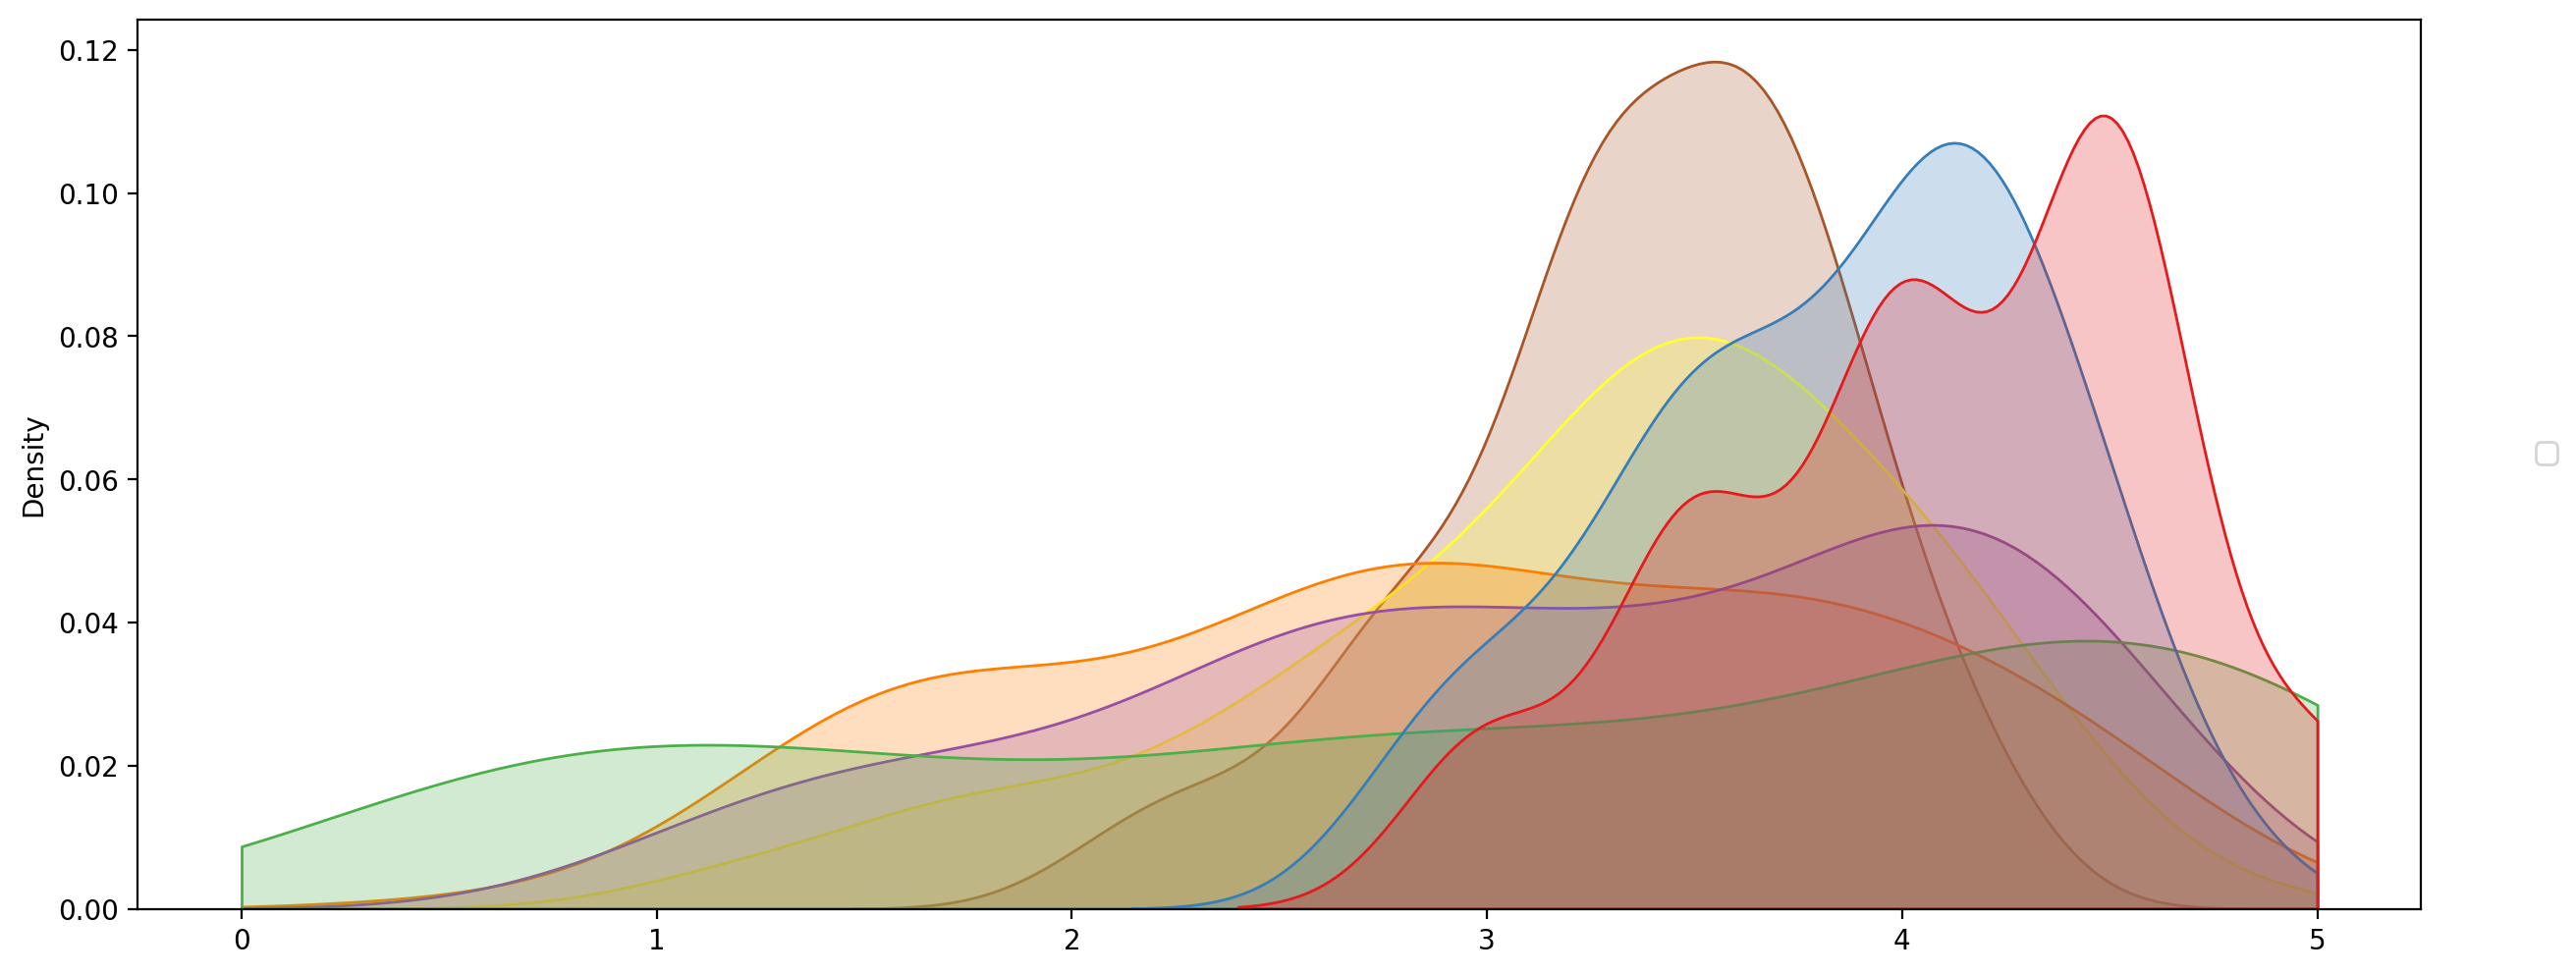

In [51]:
plt.figure(figsize=(15,6), dpi=200)
sns.kdeplot(data=norm_score, clip=[0,5], shade=True, palette='Set1')
plt.legend(loc=(1.05, 0.5))

## So, when we are trying to move the legend out of the plot it says that 'no lables can be found'. I despretly wanted the legent out of the KDE plot. After a hour of research I have found that Michael Waskom (founder of Seaborn) have given a func def to move the legend outside of the figure. Basically to fix this bug.

### Link to Michael Waskom's artice: __https://github.com/mwaskom/seaborn/issues/2280__

In [52]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

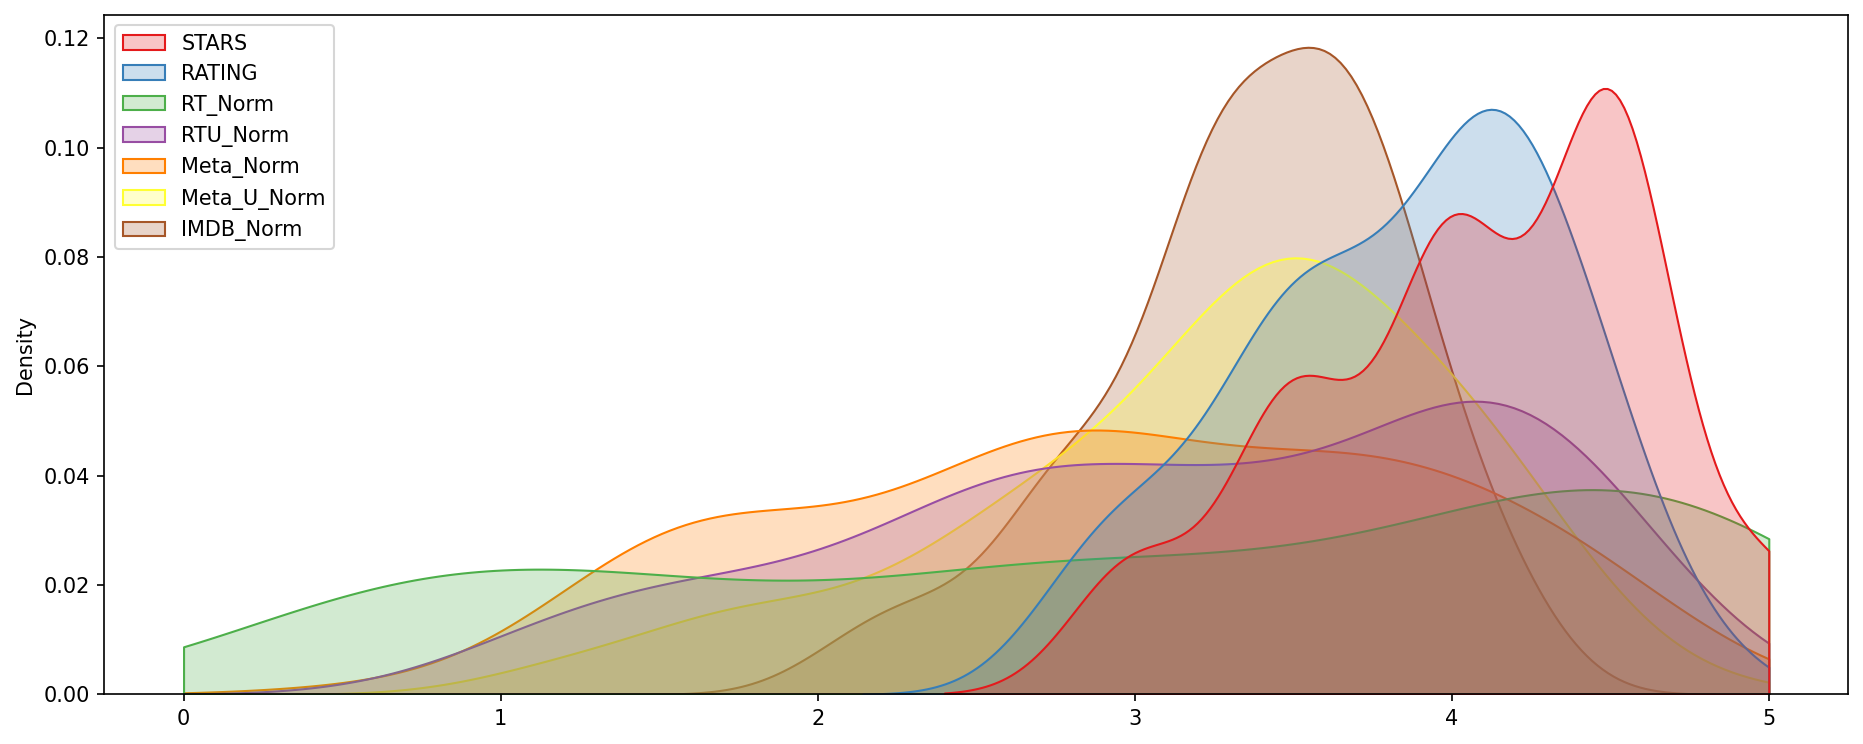

In [82]:
#we have created a subplot and ploted out df on each of subplots to move the legend to upper left
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_score,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")
plt.savefig('kde_normalized.png')

### Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

### Creating a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

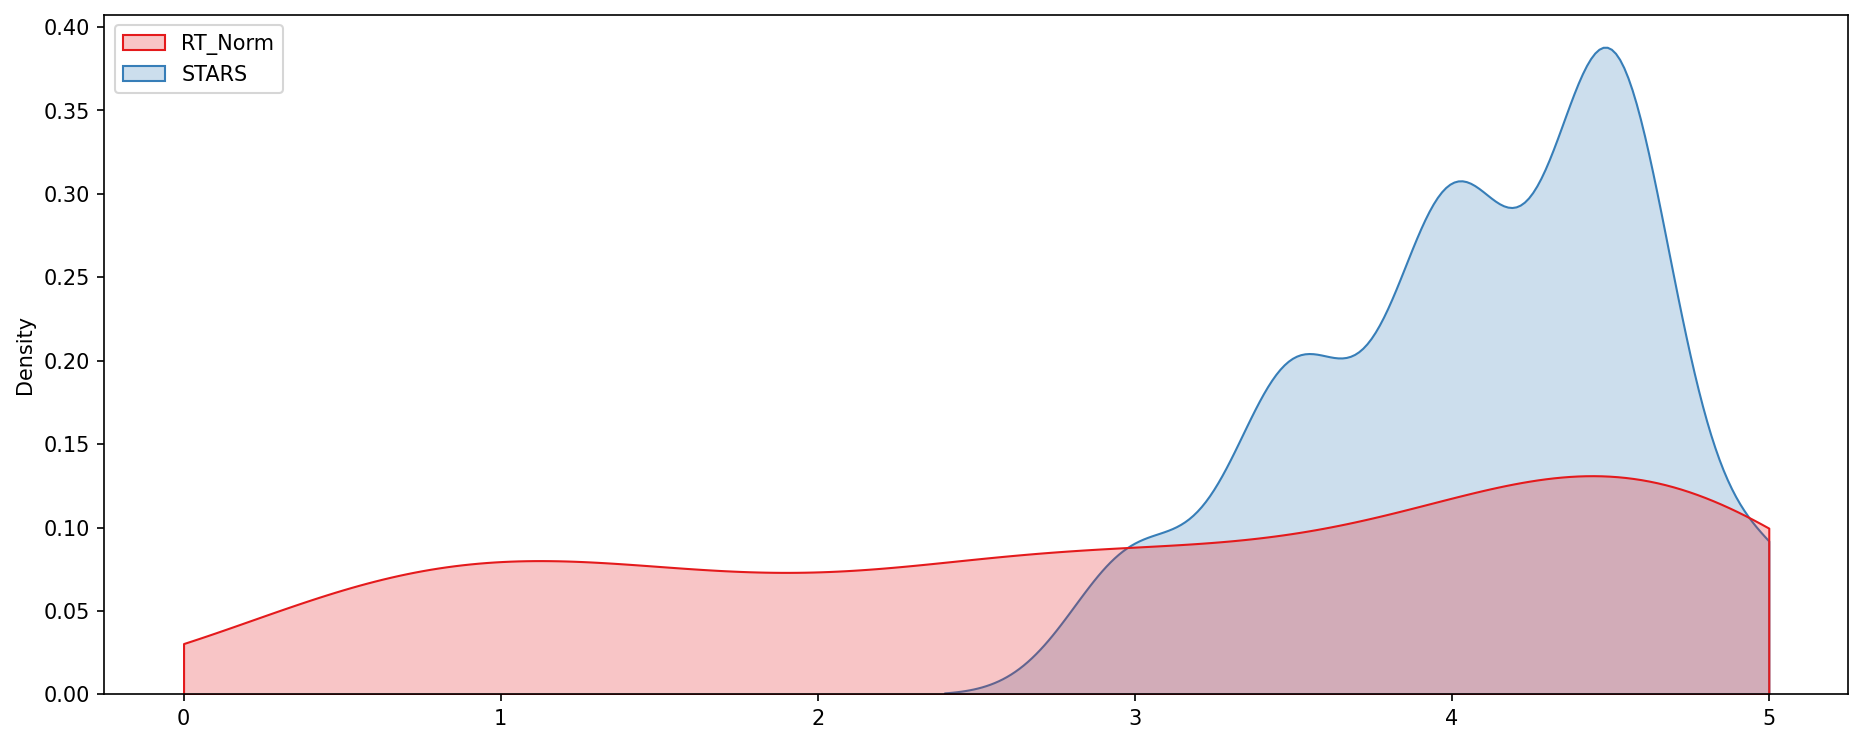

In [81]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_score[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1', ax=ax)
move_legend(ax, 'upper left')
plt.savefig('RT_Vs_STARS.png')

It the above plot you can notice that how rotten tomato have a way lower rating when compared to the stars that are diplayed on the Fandango website.

## Creating a histplot comparing all normalized scores.

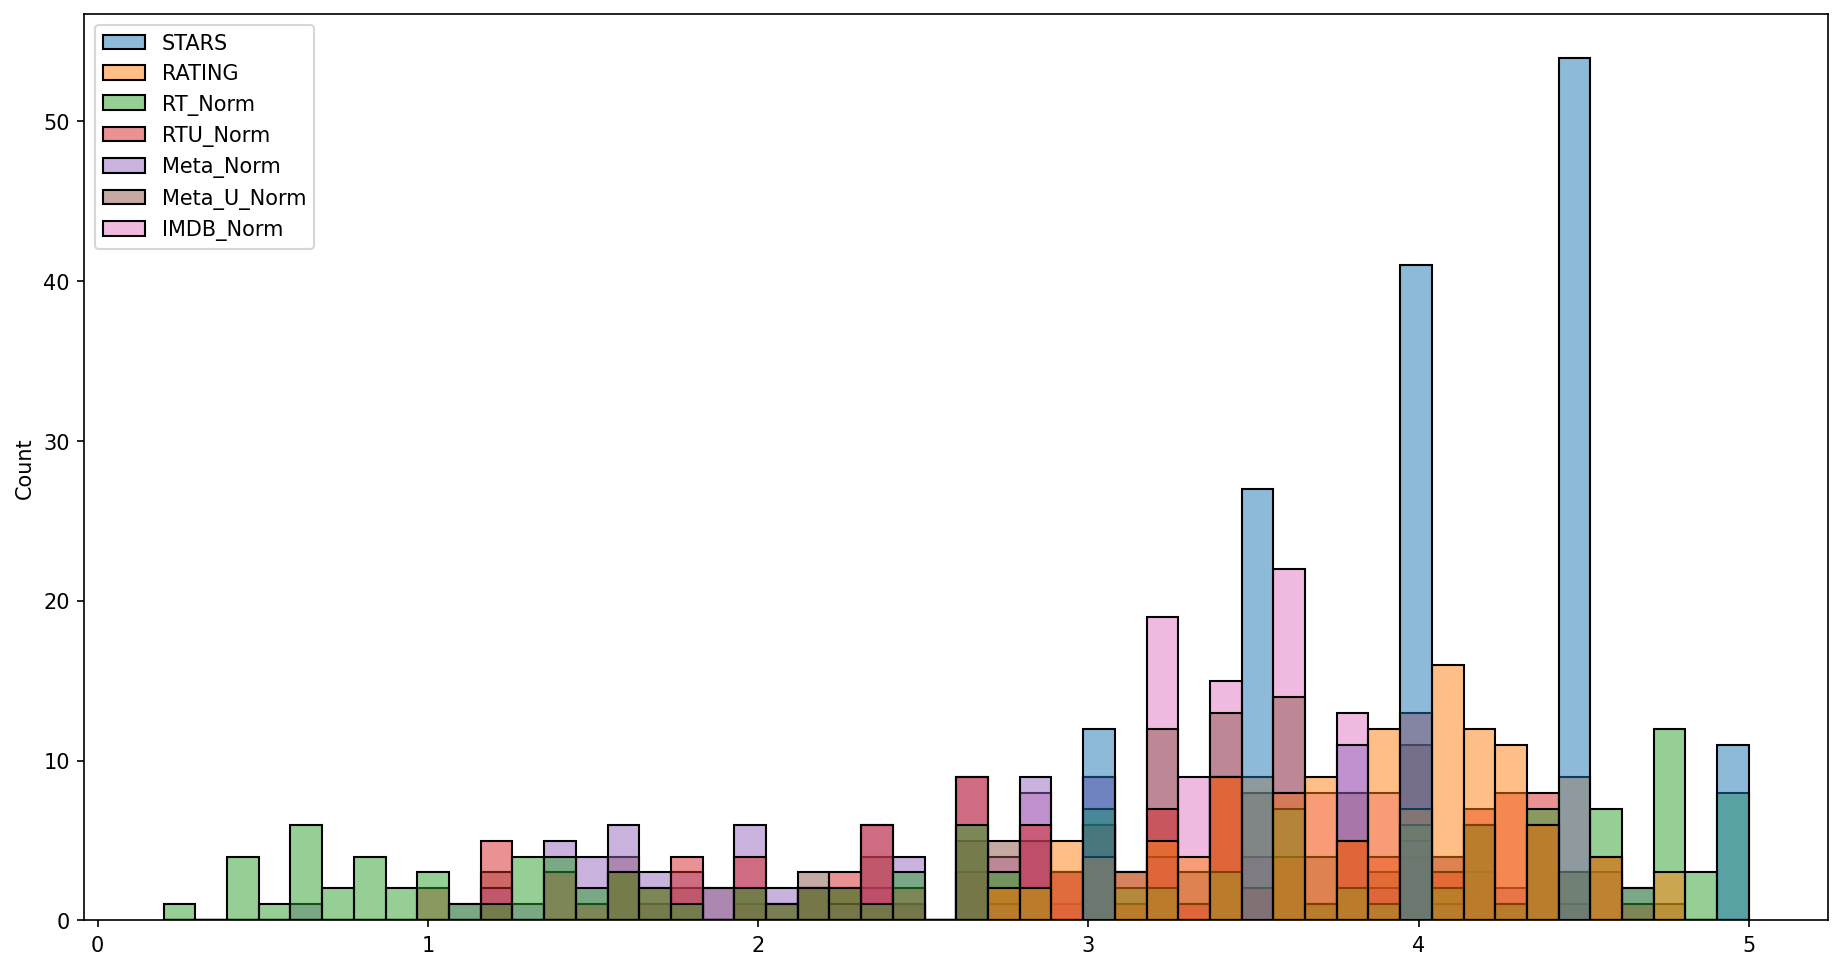

In [80]:
#using the same fun call as above because we need to move the legend
fig, ax = plt.subplots(figsize=(15,8), dpi=150)
sns.histplot(data=norm_score, bins=50)
move_legend(ax, 'upper left')
plt.savefig('compared_normalization_scores.png')

### To find the answer for the question `How are the worst movies rated across all platforms?` 
### Creating a clustermap visualization of all normalized scores.

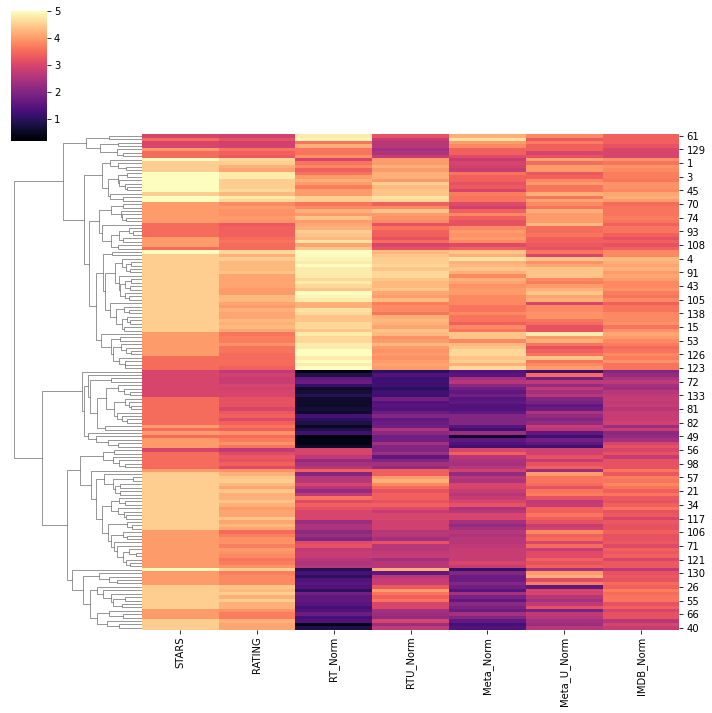

In [79]:
sns.clustermap(norm_score, cmap='magma', col_cluster=False)
plt.savefig('normalization_scores.png')

In the above figure what it does is basically clusters all the movie's together based on the rating. The darker the violet the lower the movie rating. But, in case of Fandango there are hardly any darker violet, which basically means that there are no movies rated lesser.

### It is very much evedient that Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.

Let's try to figure out the top 10 worst movies. Based off the `Rotten Tomatoes Critic Ratings`, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?

In [69]:
#We are adding the FILM column back in to your DataFrame
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [70]:
norm_films.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [72]:
norm_films.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


## Finally, visualizing the distribution of ratings across all sites for the top 10 worst movies.

In [73]:
#creating worst films df to drop off the film column
worst_movie = norm_films.nsmallest(10, 'RT_Norm').drop('FILM', axis=1)

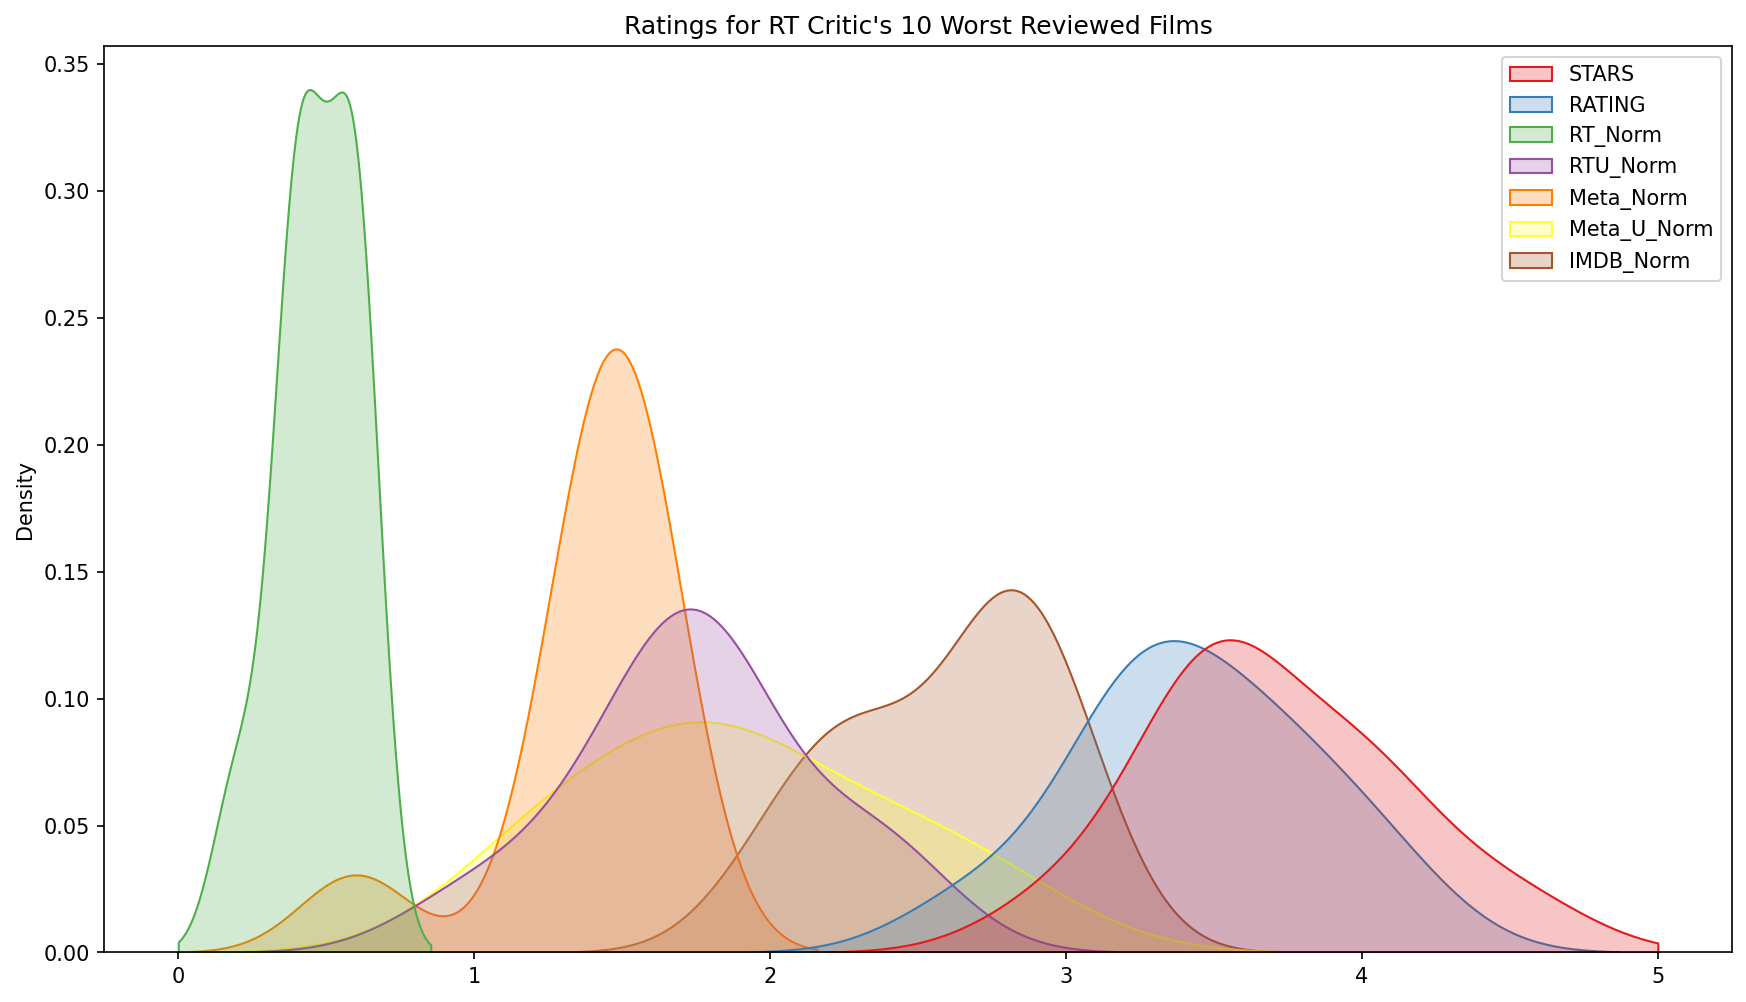

In [78]:
#ploting worst_movie on a kde plot
print('\n\n')
plt.figure(figsize=(14, 8), dpi=150)
sns.kdeplot(data=worst_movie, clip=[0,5], shade=True, palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");
plt.savefig("Ratings for RT Critic's 10 Worst Reviewed Films.png")

**Final thoughts: Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">